In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing, metrics

/var/folders/yt/kpjs1sb134xbh0gd8yy86l5r0000gn/T/ipykernel_72268/4091843290.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#1 Load data 

white_data = pd.read_excel("data/winequality-white.xlsx", index_col=None, na_values='NA')
red_data = pd.read_excel("data/winequality-red.xlsx", index_col=None, na_values='NA')

In [3]:
white_data.shape


(4899, 12)

In [4]:
red_data.shape

(1600, 12)

In [5]:
white_data.columns

Index(['winequality-white', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [6]:
red_data.columns

Index(['winequality-red', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [7]:
red_data.head()

,winequality-red,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


In [8]:
#Clean the data in both files.

red_data.columns = red_data.iloc[0]

red_data = red_data[1:]

red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [9]:
#Clean the data in both files.

white_data.columns = white_data.iloc[0] 
white_data = white_data[1:]

white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2,6
4895,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6,5
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
4897,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7


In [10]:
white_data.isnull().sum()

0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
red_data.isnull().sum()

0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599,1599,1599.00,1599,1599,1599.0000,1599.0,1599.0,1599.0,1599
unique,96.0,143.0,80,91,153.00,60,144,436.0000,89.0,96.0,65.0,6
top,7.2,0.6,0,2,0.08,6,28,0.9972,3.3,0.6,9.5,5
freq,67.0,47.0,132,156,66.00,138,43,36.0000,57.0,69.0,139.0,681


In [13]:
red_data.isna().sum()   

0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
white_data.isna().sum()

0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# 3 Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”

#Before concatenating the data, we need to add a column to each dataframe to indicate whether the wine is red or white.

red_data["wine_type"] = "red"
white_data["wine_type"] = "white"

#Combine the dataframes

wines = pd.concat([red_data, white_data])

wines.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,red
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


In [16]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.0,6497.00,6497.0,6497,6497.000,6497,6497,6497.0000,6497.00,6497.0,6497.0,6497,6497
unique,106.0,187.00,89.0,316,214.000,135,276,998.0000,108.00,111.0,111.0,7,2
top,6.8,0.28,0.3,2,0.044,29,111,0.9976,3.16,0.5,9.5,6,white
freq,354.0,286.00,337.0,235,206.000,183,72,69.0000,200.00,276.0,367.0,2836,4898


In [17]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,red
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


In [18]:
# 4 Explore the features of the original and the new files:
# a. number of rows and columns

print("Original red wine data:", red_data.shape) 
print("Original white wine data:", white_data.shape) 
print("New Data Shape:", wines.shape)

Original red wine data: (1599, 13)
Original white wine data: (4898, 13)
New Data Shape: (6497, 13)


In [19]:
# B: type of data in each column

wines.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 1 to 4898
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         6497 non-null   object
 1   volatile acidity      6497 non-null   object
 2   citric acid           6497 non-null   object
 3   residual sugar        6497 non-null   object
 4   chlorides             6497 non-null   object
 5   free sulfur dioxide   6497 non-null   object
 6   total sulfur dioxide  6497 non-null   object
 7   density               6497 non-null   object
 8   pH                    6497 non-null   object
 9   sulphates             6497 non-null   object
 10  alcohol               6497 non-null   object
 11  quality               6497 non-null   object
 12  wine_type             6497 non-null   object
dtypes: object(13)
memory usage: 710.6+ KB


In [20]:
# 5. Calculate the descriptive statistics of the numeric data. Is the data normally distributed?

wines.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.0,6497.00,6497.0,6497,6497.000,6497,6497,6497.0000,6497.00,6497.0,6497.0,6497,6497
unique,106.0,187.00,89.0,316,214.000,135,276,998.0000,108.00,111.0,111.0,7,2
top,6.8,0.28,0.3,2,0.044,29,111,0.9976,3.16,0.5,9.5,6,white
freq,354.0,286.00,337.0,235,206.000,183,72,69.0000,200.00,276.0,367.0,2836,4898


In [21]:
wines['alcohol'] = pd.to_numeric(wines['alcohol'], errors='coerce')

# Check the conversion by looking at the data type again
print(wines['alcohol'].dtype)  # Should now be 'float64' or similar numeric type

# Also, check for any NaN values that may have resulted from the conversion
print(wines['alcohol'].isna().sum(), "NaN values in 'alcohol' column.")

float64
0 NaN values in 'alcohol' column.


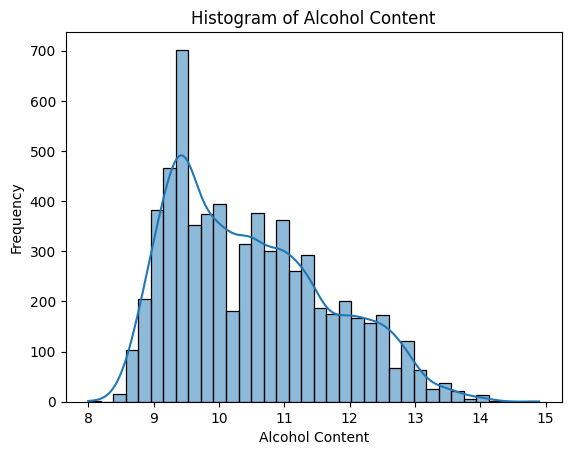

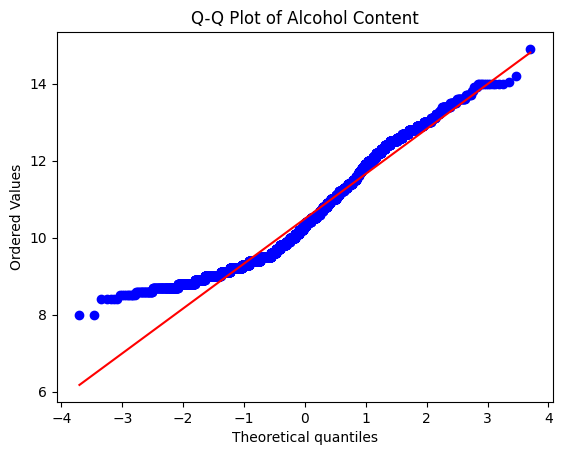

In [22]:
from scipy import stats

sns.histplot(wines['alcohol'], kde=True)
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()


stats.probplot(wines['alcohol'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Alcohol Content')
plt.show()

In [23]:
wines['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

When we look at the histogram and the Q-Q plot, we can see that the data is not normally distributed. The histogram is skewed to the right, and the Q-Q plot shows that the data points do not fall on the line. This means that the data is not normally distributed.

On the histogram we can see that there is a peak at around 9.5% alcohol content, and the frequency of alcohol content decreases as the alcohol content increases. This is consistent with what we would expect, as most wines have an alcohol content between 8% and 15%.

Now this is the data for the combination of both whine types (red and white).

It could be interesting to see whether the red or white wine contains the highest amount of alcohol

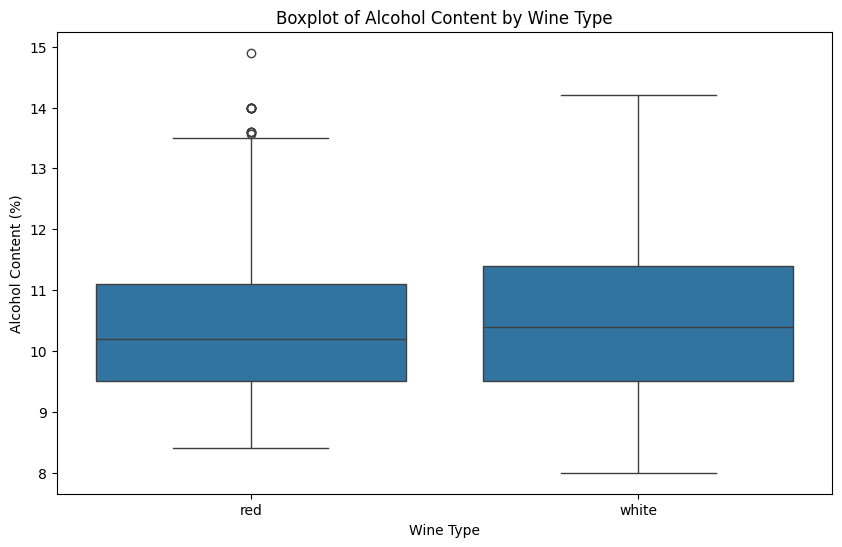

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type', y='alcohol', data=wines)
plt.title('Boxplot of Alcohol Content by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Alcohol Content (%)')
plt.show()

In [25]:
wines["alcohol"].median()

10.3

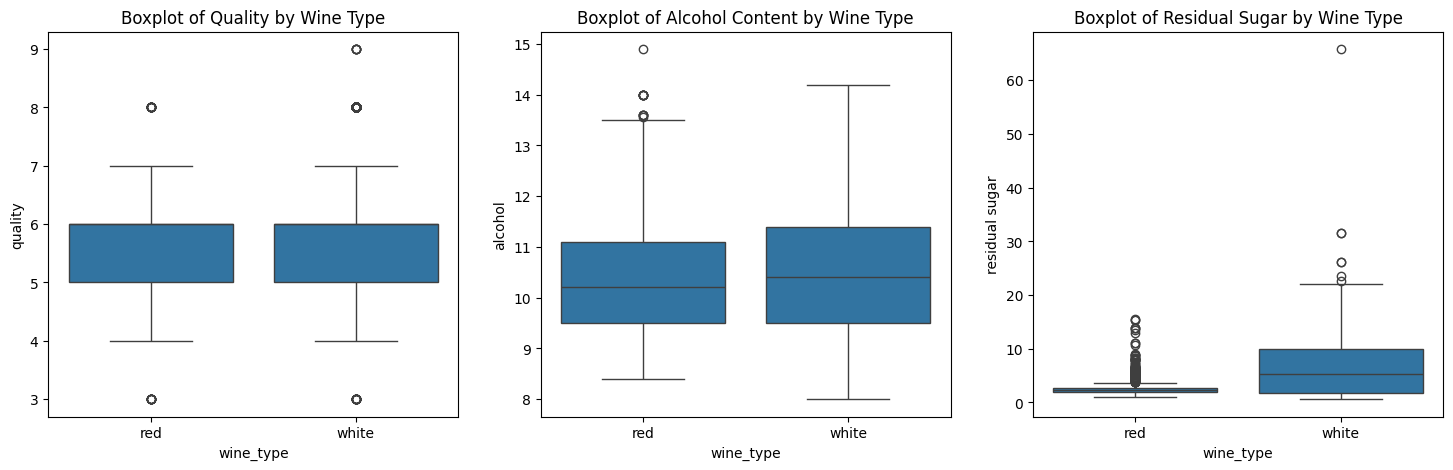

In [26]:
# 6. Plot diagrams that visualize the differences in red and white wine samples. Use it as a support for
# answering the following questions:



plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.boxplot(x='wine_type', y='quality', data=wines)
plt.title('Boxplot of Quality by Wine Type')


plt.subplot(1, 3, 2)
sns.boxplot(x='wine_type', y='alcohol', data=wines)
plt.title('Boxplot of Alcohol Content by Wine Type')


plt.subplot(1, 3, 3)
sns.boxplot(x='wine_type', y='residual sugar', data=wines)
plt.title('Boxplot of Residual Sugar by Wine Type')



plt.show()


6.a+b+c+d what exactly is shown on the diagrams? 

By creating these boxplots we see the distribution of quality, alcohol and residual sugar for the 2 wine types.

From the boxplot for quality we see that the median of both red and white wine is similar, with white wine having a slightly higer quality.

When looking at the alcohol content we see that the median alcohol content for white wine is higher than in red wine.

The biggest difference of red and white wine in these 3 boxplots are within the boxplot for residual sugar. 
White wine have a higher median of residual sugar than red wine, and also have a higher variation. 

For all the boxplots we can see that there are some outliers, mostly on red wines residual sugar. 


#7. Which other questions might be of interest for the wine consumers or distributers?

some of the questions consumers may be interested in could be the the comparison of value for money.
One could be interested in knowing whether there is a connection between price and quality, or maybe if there is one type of wine that offers better value for money in the sense of quality.

One may also be interested of knowing whether there is a tendency of identicle chemicle profiles for the wine in its price range? So has cheaper wine the same kind of chimacle profile as eachother? 



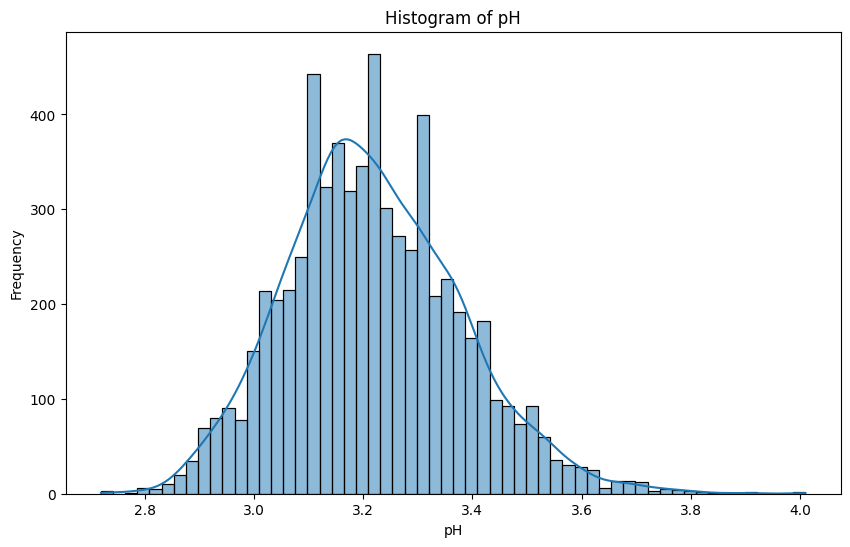

(Interval(2.978, 3.236, closed='right'),
 Interval(3.107, 3.236, closed='right'))

In [31]:
#8. Split the aggregated data into five subsets by binning the attribute pH. Identify the subset with
# the highest density? What if you split the data in ten subsets?

# We will start out by creating a histogram of the pH data to see the distribution of the data.

plt.figure(figsize=(10, 6))
sns.histplot(wines['pH'], kde=True)

plt.title('Histogram of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

# We can see that the pH data is not normally distributed. We will use the cut function to bin the data into 5 and 10 equal-width bins.

num_bins_5 = 5
num_bins_10 = 10


wines['pH_bin_5'] = pd.cut(wines['pH'], bins=num_bins_5)
density_5_bins = wines['pH_bin_5'].value_counts().sort_index()

wines['pH_bin_10'] = pd.cut(wines['pH'], bins=num_bins_10)
density_10_bins = wines['pH_bin_10'].value_counts().sort_index()

# Now we will identify the bin with the highest density for 5 and 10 bins.
highest_density_bin_5 = density_5_bins.idxmax()

highest_density_bin_10 = density_10_bins.idxmax()

# Finally, we will print the results.
highest_density_bin_5, highest_density_bin_10


In [28]:
# To see the density of each bin, we can print the value counts for each bin.

print(density_5_bins)
print(density_10_bins)

pH_bin_5
(2.719, 2.978]     350
(2.978, 3.236]    3344
(3.236, 3.494]    2465
(3.494, 3.752]     322
(3.752, 4.01]       16
Name: count, dtype: int64
pH_bin_10
(2.719, 2.849]      16
(2.849, 2.978]     334
(2.978, 3.107]    1233
(3.107, 3.236]    2111
(3.236, 3.365]    1663
(3.365, 3.494]     802
(3.494, 3.623]     263
(3.623, 3.752]      59
(3.752, 3.881]      12
(3.881, 4.01]        4
Name: count, dtype: int64
